In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import matplotlib.style as style
from matplotlib import pyplot as plt
style.use('fivethirtyeight')
rc={'font.family': ['avenir'],
    'axes.edgecolor': '0',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.titleweight':'bold',
    'axes.labelsize':15,
    'axes.labelcolor': '0',
    'axes.labelpad':10,
    'axes.titlesize': 20,
    'axes.titlepad':15,
    'font.family': ['Avenir'],
    'axes.facecolor':'#f2f2f2', 
    'figure.facecolor':'white',
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.major.pad': 0,
    'xtick.major.pad': 5,
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.minor.width': 100,
    'xtick.color':'0'}

In [2]:
songList = pd.read_csv('songlistFeatures2.csv',index_col=0)

In [3]:
moods = ['happy','sad','energetic','calm']
for x in moods:
    print(x,': ',len(songList[songList['p_mood']==x]))

happy :  1277
sad :  1267
energetic :  1024
calm :  1112


In [4]:
a = list(songList.columns)
songList[a]

,p_mood,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
0,energetic,Catarina Rocha Leite,energetic songs,0.222835,0.091268,2.282446,0.091268,-30.696143,127.203433,0.398784,1.772535e-02
1,energetic,Catarina Rocha Leite,energetic songs,0.420397,0.088682,14.942889,0.088682,-26.944690,160.819083,0.293910,1.140000e-05
2,energetic,Catarina Rocha Leite,energetic songs,0.285548,0.102670,-2.382865,0.102670,-33.766857,207.888509,0.267919,3.210000e-06
3,energetic,Catarina Rocha Leite,energetic songs,0.254056,0.104678,5.549131,0.104678,-28.565548,82.175243,0.234389,5.650000e-07
4,energetic,Catarina Rocha Leite,energetic songs,0.430952,0.101767,18.282002,0.101767,-24.450310,187.229778,0.306009,1.780000e-05
...,...,...,...,...,...,...,...,...,...,...,...
4675,sad,anniekate,sad songs for sad nights,0.300581,0.096950,2.974069,0.096950,-26.242952,64.837654,0.204918,4.678499e-03
4676,sad,anniekate,sad songs for sad nights,0.243466,0.085309,-6.639613,0.085309,-26.299095,66.003791,0.296994,1.069455e-02
4677,sad,anniekate,sad songs for sad nights,0.319913,0.091975,2.223764,0.091975,-21.430548,46.883029,0.348792,1.367088e-02
4678,sad,anniekate,sad songs for sad nights,0.215099,0.090113,-8.754875,0.090113,-31.988643,133.329421,0.274564,6.810000e-05


In [5]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.count()

,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
p_mood,,,,,,,,,,
calm,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
energetic,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
happy,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277
sad,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267


In [6]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.mean()

,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
p_mood,,,,,,,,
calm,0.233894,0.091949,-10.390181,0.091949,-34.019412,67.096046,0.308224,0.004322
energetic,0.310608,0.092644,4.094632,0.092644,-26.585512,99.931396,0.257130,0.000963
happy,0.307169,0.091876,5.014462,0.091876,-25.780490,108.823916,0.259036,0.000538
sad,0.260629,0.093377,-4.072856,0.093377,-30.625369,85.320936,0.275658,0.002416


In [7]:
songList.groupby(by=['p_mood']).corr()

pitch_mean  pitch_variance  timbre_mean  \
p_mood                                                                  
calm      pitch_mean            1.000000        0.328733     0.461707   
          pitch_variance        0.328733        1.000000     0.081292   
          timbre_mean           0.461707        0.081292     1.000000   
          timbre_variance       0.328733        1.000000     0.081292   
          intensity_mean        0.203273        0.126480     0.425683   
          intensity_variance    0.338444        0.225527     0.540467   
          rhythm_mean          -0.152276       -0.022132    -0.212879   
          rhythm_variance      -0.131424       -0.108563    -0.144235   
energetic pitch_mean            1.000000        0.014105     0.255578   
          pitch_variance        0.014105        1.000000    -0.178244   
          timbre_mean           0.255578       -0.178244     1.000000   
          timbre_variance       0.014105        1.000000    -0.178244   
          intensity_mean        0.076765       -0.145804     0.349456   
          intensity_variance    0.118970        0.095728     0.218606   
          rhythm_mean          -0.020262        0.040944    -0.050870   
          rhythm_variance      -0.064791        0.037990    -0.113848   
happy     pitch_mean            1.000000       -0.000078     0.278531   
          pitch_variance       -0.000078        1.000000    -0.205248   
          timbre_mean           0.278531       -0.205248     1.000000   
          timbre_variance      -0.000078        1.000000    -0.205248   
          intensity_mean        0.041558       -0.218820     0.319062   
          intensity_variance    0.182760        0.114796     0.205649   
          rhythm_mean          -0.066197        0.047387    -0.062071   
          rhythm_variance      -0.019692        0.039900    -0.073482   
sad       pitch_mean            1.000000        0.240037     0.299957   
          pitch_variance        0.240037        1.000000    -0.126445   
          timbre_mean           0.299957       -0.126445     1.000000   
          timbre_variance       0.240037        1.000000    -0.126445   
          intensity_mean        0.036105       -0.065467     0.298046   
          intensity_variance    0.146981        0.103434     0.282585   
          rhythm_mean          -0.013073        0.003740    -0.045955   
          rhythm_variance      -0.048133        0.004584    -0.036432   

                              timbre_variance  intensity_mean  \
p_mood                                                          
calm      pitch_mean                 0.328733        0.203273   
          pitch_variance             1.000000        0.126480   
          timbre_mean                0.081292        0.425683   
          timbre_variance            1.000000        0.126480   
          intensity_mean             0.126480        1.000000   
          intensity_variance         0.225527        0.429413   
          rhythm_mean               -0.022132       -0.184670   
          rhythm_variance           -0.108563       -0.254545   
energetic pitch_mean                 0.014105        0.076765   
          pitch_variance             1.000000       -0.145804   
          timbre_mean               -0.178244        0.349456   
          timbre_variance            1.000000       -0.145804   
          intensity_mean            -0.145804        1.000000   
          intensity_variance         0.095728        0.028237   
          rhythm_mean                0.040944       -0.084856   
          rhythm_variance            0.037990       -0.173685   
happy     pitch_mean                -0.000078        0.041558   
          pitch_variance             1.000000       -0.218820   
          timbre_mean               -0.205248        0.319062   
          timbre_variance            1.000000       -0.218820   
          intensity_mean            -0.218820        1.000000   
          intensity_variance         0.114796       

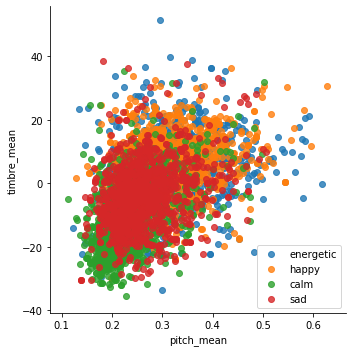

In [51]:
# library & dataset
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="pitch_mean", y="timbre_mean", data=songList, fit_reg=False, hue='p_mood', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

In [52]:
songList.sample(frac=1)

,p_mood,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
249,energetic,littlemissspotify123,Energetic Pop,0.230722,0.094857,7.615813,0.094857,-32.854405,142.770993,0.239970,0.000002
851,energetic,adidas,addis | Energetic Run,0.298034,0.095673,31.600869,0.095673,-27.457500,86.709751,0.243795,0.000007
1013,energetic,giesen.tobi,Energetic EDM - Sports Motivation,0.335268,0.089262,11.191442,0.089262,-22.339024,109.839624,0.235832,0.000013
2218,happy,Blurred Lines,"Positive Energy - Positivity, Happy",0.248704,0.101162,13.202978,0.101162,-18.032619,154.004252,0.230850,0.000004
498,energetic,littlemissspotify123,Energetic Pop,0.200970,0.083851,-10.431093,0.083851,-28.169095,76.335593,0.173438,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
110,energetic,Catarina Rocha Leite,energetic songs,0.151560,0.080777,23.711905,0.080777,-30.448952,67.637050,0.313058,0.000040
2953,calm,Ami Ellqvist,Calm Songs,0.233472,0.098251,0.288929,0.098251,-30.047857,76.695084,0.400783,0.017949
1516,happy,Ischtar Isik,Happy Mood,0.278804,0.084756,5.826058,0.084756,-33.950952,54.524207,0.231126,0.000012
1449,happy,Indiemono,"Happy Songs 80s, 90s,200s",0.352821,0.096025,21.296476,0.096025,-14.457119,120.398725,0.192650,0.004137


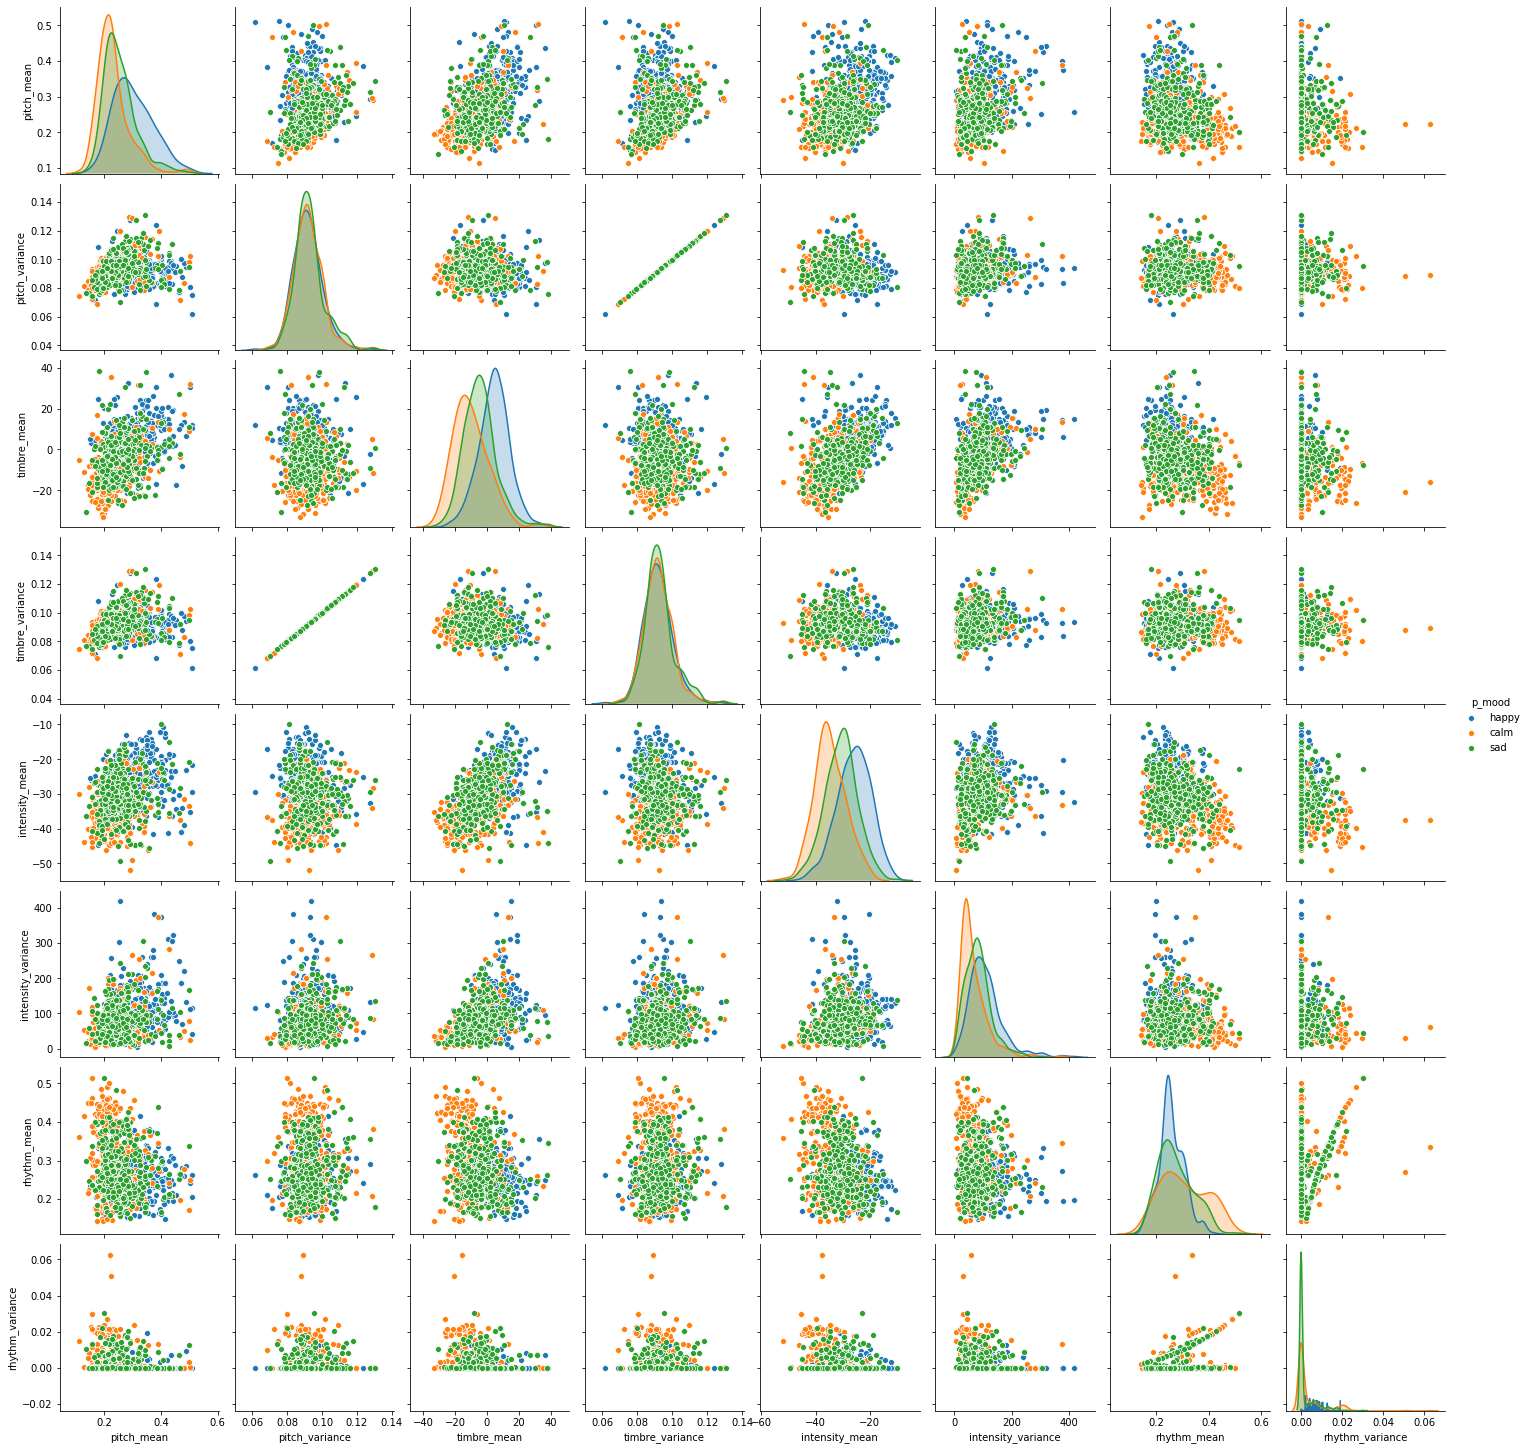

In [96]:
sns.pairplot(songList[songList['p_mood'] != 'energetic'].sample(frac=1)[:1000],hue="p_mood")

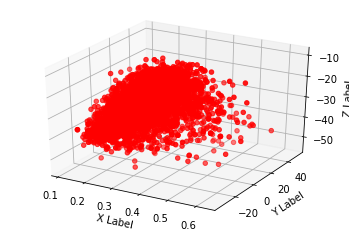

In [99]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

x = songList['pitch_mean'].to_numpy()
y = songList['timbre_mean'].to_numpy()
z = songList['intensity_mean'].to_numpy()



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

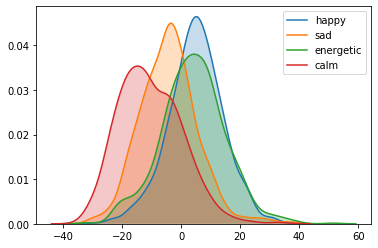

In [100]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    sns.kdeplot(songList[songList['p_mood']==mood]['timbre_mean'], shade=True,label=mood)

Index(['p_mood', 'p_creator', 'p_name', 'pitch_mean', 'pitch_variance',
       'timbre_mean', 'timbre_variance', 'intensity_mean',
       'intensity_variance', 'rhythm_mean', 'rhythm_variance'],
      dtype='object')
pitch_mean


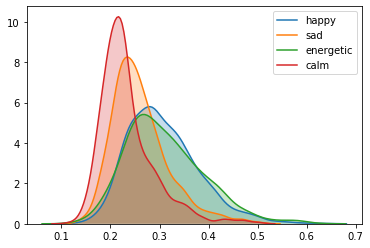

pitch_variance


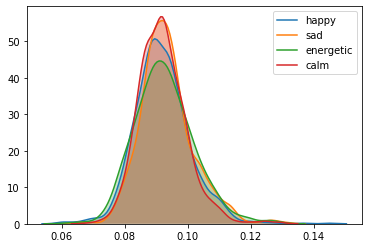

timbre_mean


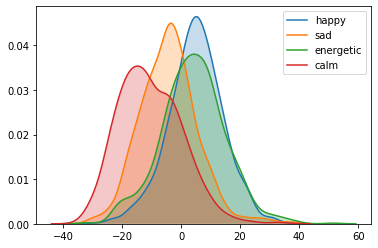

timbre_variance


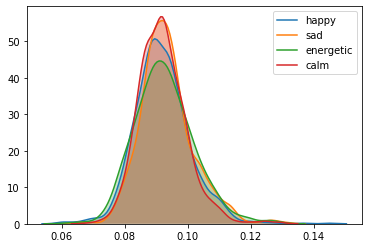

intensity_mean


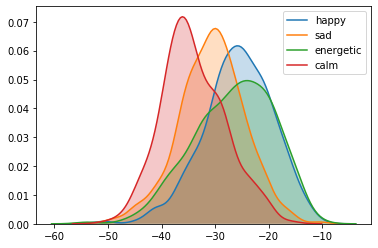

intensity_variance


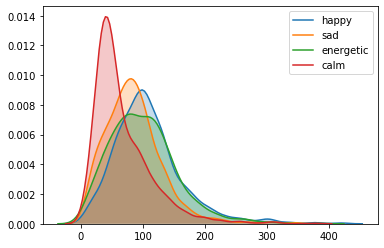

rhythm_mean


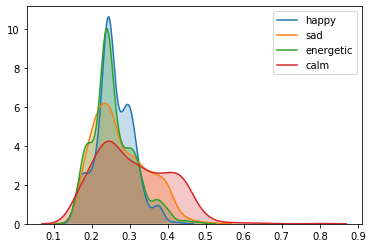

rhythm_variance


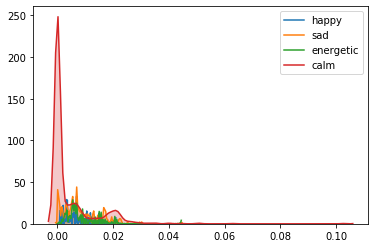

In [65]:
a = songList.dtypes == 'float64'
print(a.index)
for x in range(len(a)):
    
    if(a[x]):
        try:
            print(a.index[x])
            for mood in moods:
                g = sns.kdeplot(songList[songList['p_mood']==mood][a.index[x]], shade=True,label=mood)
            plt.show(g)
        except:
            print("didnt work")

happy


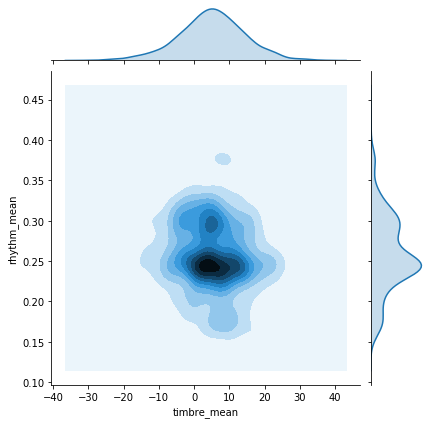

sad


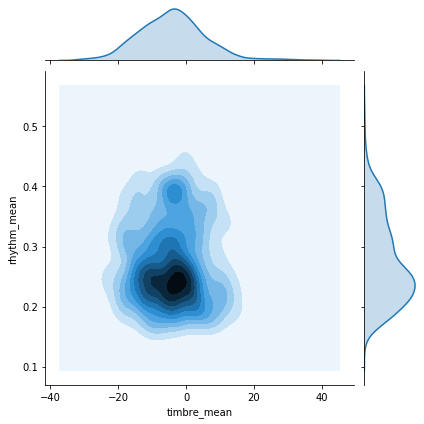

energetic


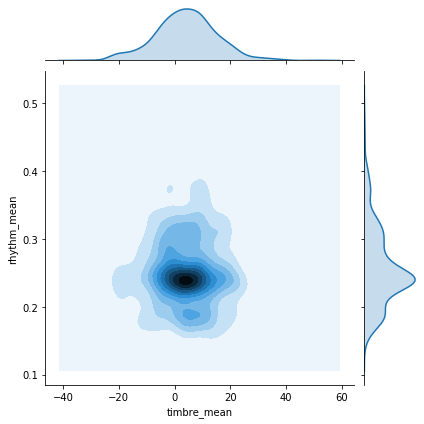

calm


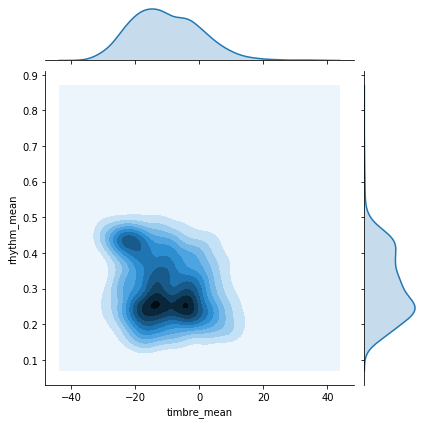

In [66]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    print(mood)
    g = sns.jointplot("timbre_mean", "rhythm_mean", data=songList[songList['p_mood']==mood], kind='kde');
    plt.show(g)

In [67]:
cols = ['p_mood','pitch_mean','pitch_variance','timbre_mean','timbre_variance','intensity_mean','intensity_variance','rhythm_mean','rhythm_variance']

In [92]:
def getscore(num_steps, data, y_vals):
    X = data.loc[:,data.columns != 'p_mood'].to_numpy()
    y = y_vals.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    clf = RandomForestClassifier(max_depth=num_steps).fit(X_train,y_train)
    
    data = {'y_Actual':    y_test,
        'y_Predicted': clf.predict(X_test)
        }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    plt.show()
    return [num_steps, clf.score(X_test,y_test), clf.score(X_train,y_train)]

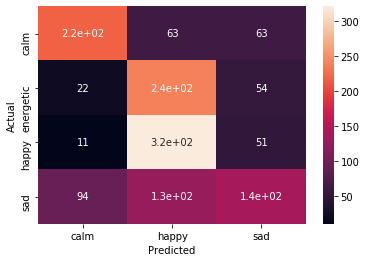

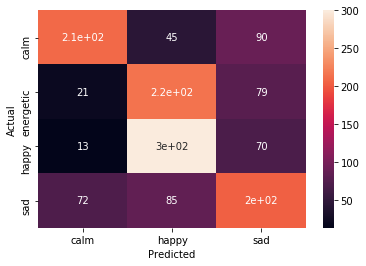

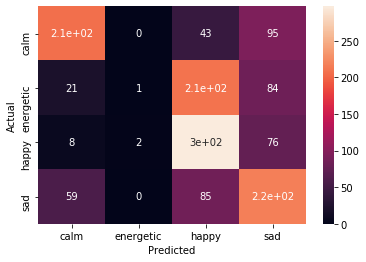

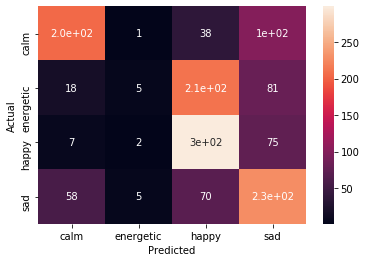

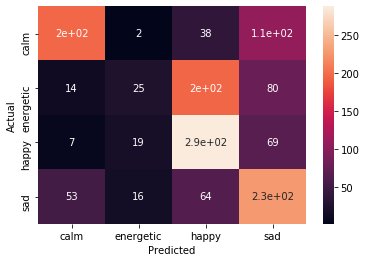

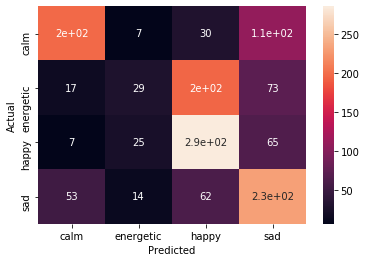

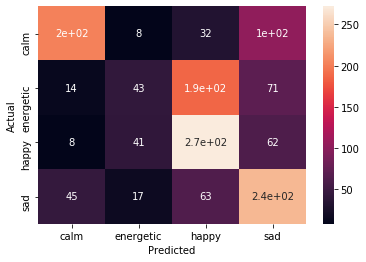

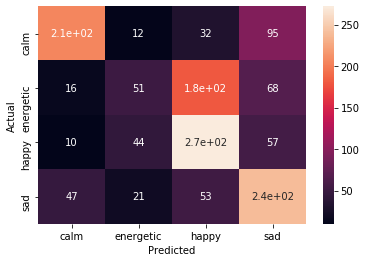

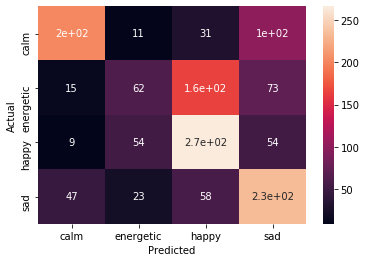

num_steps      4.000000
test_score     0.524929
train_score    0.542125
Name: 3, dtype: float64


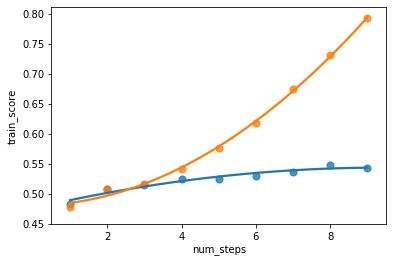

,num_steps,test_score,train_score
0,1.0,0.483618,0.478938
1,2.0,0.508547,0.507631
2,3.0,0.514245,0.516484
3,4.0,0.524929,0.542125
4,5.0,0.525641,0.576923
5,6.0,0.530627,0.619048
6,7.0,0.536325,0.674603
7,8.0,0.547721,0.731074
8,9.0,0.543447,0.793651


In [93]:
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
data = songList[cols]
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data, songList['p_mood'])
print(scoreData.iloc[3,:])
g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
plt.show(g)
scoreData

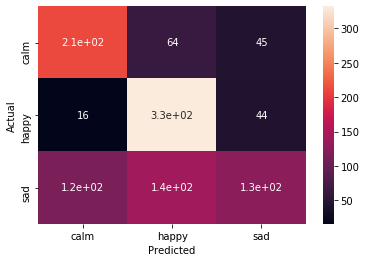

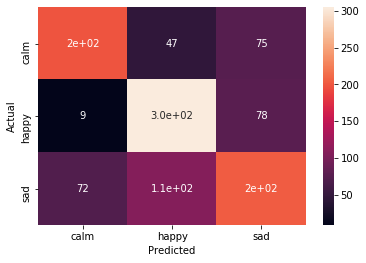

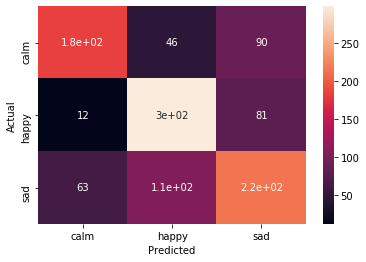

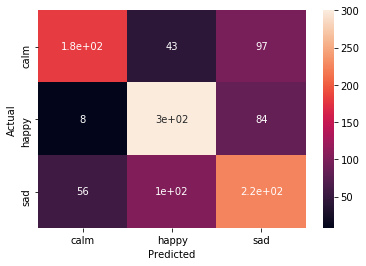

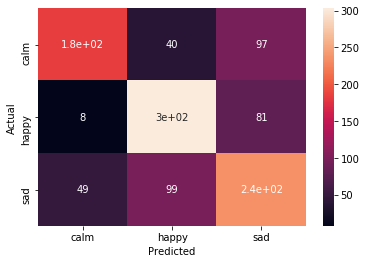

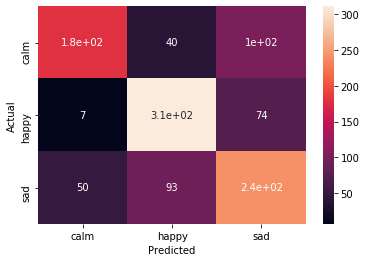

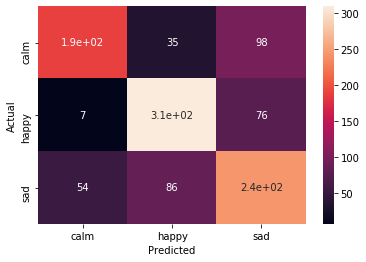

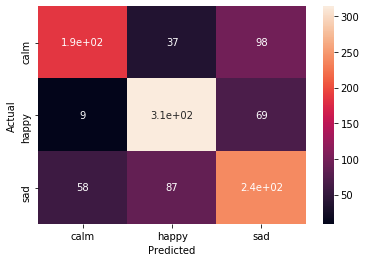

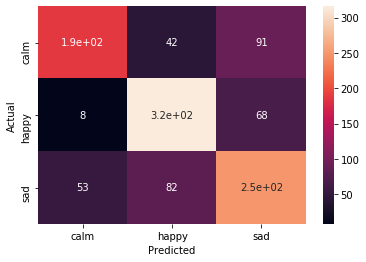

num_steps      4.000000
test_score     0.643573
train_score    0.676436
Name: 3, dtype: float64


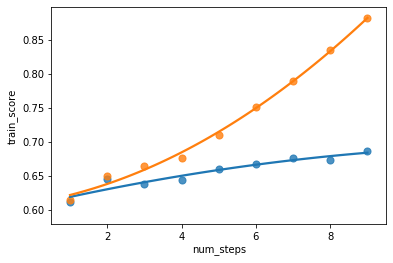

,num_steps,test_score,train_score
0,1.0,0.610757,0.613521
1,2.0,0.645397,0.649472
2,3.0,0.637192,0.663931
3,4.0,0.643573,0.676436
4,5.0,0.659070,0.710434
5,6.0,0.667274,0.751075
6,7.0,0.675479,0.789371
7,8.0,0.673655,0.834701
8,9.0,0.686418,0.881594


In [94]:
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
data = songList[songList['p_mood'] != 'energetic'][cols]
y_vals = songList[songList['p_mood'] != 'energetic']['p_mood']
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data,y_vals)
data
print(scoreData.iloc[3,:])
g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
plt.show(g)
scoreData